In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df=pd.read_csv("irish1.csv")

In [44]:
df.head()


,sepal length,sepal width,petal length,petal width,flower type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.shape


(150, 5)

In [46]:
df.isnull().sum()

sepal length      0
sepal width       0
 petal length     0
petal width       0
 flower type      0
dtype: int64

In [47]:
df.iloc[:,4].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name:  flower type, dtype: int64

In [48]:
df.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
df_corr=df.corr()

In [50]:
df_corr

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


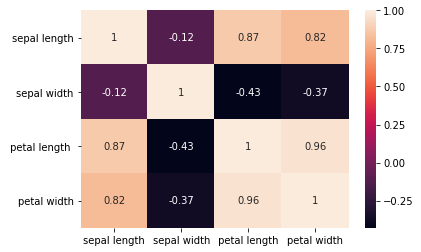

In [51]:
sns.heatmap(data=df_corr,annot=True)

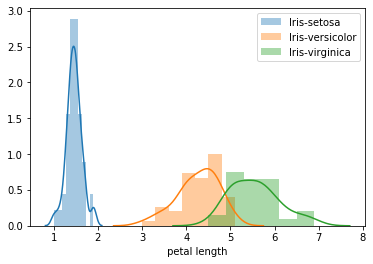

In [52]:
sns.distplot(df[' petal length '][df[' flower type']=='Iris-setosa'],label='Iris-setosa',kde=True)
sns.distplot(df[' petal length '][df[' flower type']=='Iris-versicolor'],label='Iris-versicolor',kde=True)
sns.distplot(df[' petal length '][df[' flower type']=='Iris-virginica'],label='Iris-virginica',kde=True)
plt.legend()

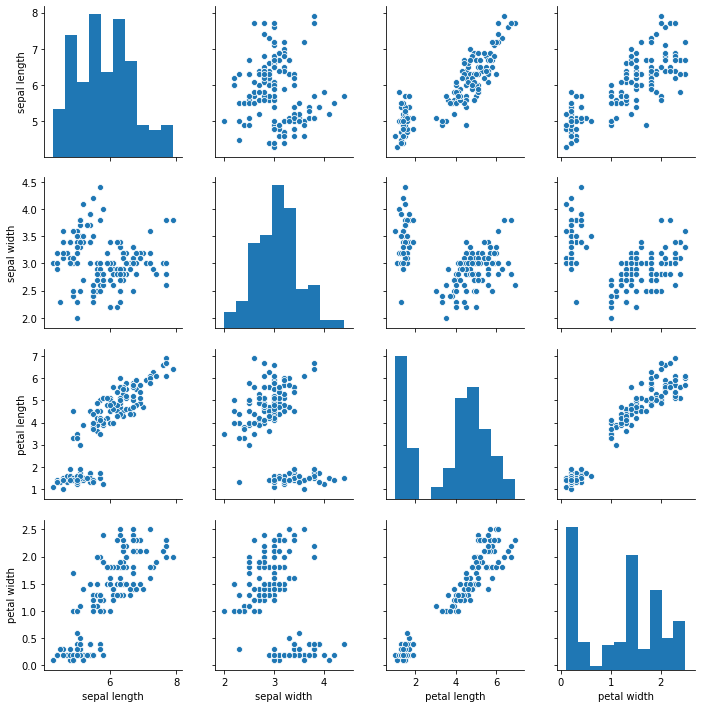

In [53]:
sns.pairplot(df)

In [54]:
df.head()

,sepal length,sepal width,petal length,petal width,flower type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
x= df.iloc[:, 0:4]
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
y=df.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name:  flower type, dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y1= labelencoder_y.fit_transform(y)

In [58]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.3)


In [85]:
from sklearn import tree

In [86]:
model=tree.DecisionTreeClassifier()

In [87]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [96]:
y_pred=model.predict(x_test)
print(y_pred)

[1 2 2 1 2 0 0 1 0 2 1 1 2 1 0 2 1 0 2 0 0 0 2 2 2 1 0 1 1 2 1 1 1 0 1 0 0
 0 2 2 2 2 0 1 2]


In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 13  0]
 [ 0  2 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      1.00      0.93        13
           2       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


In [98]:
model1=tree.DecisionTreeClassifier()

In [99]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(448.3928571428571, 498.3, 'X[2] <= 2.6\nentropy = 0.665\nsamples = 105\nvalue = [36, 37, 32]'),
 Text(388.60714285714283, 407.70000000000005, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(508.17857142857144, 407.70000000000005, 'X[3] <= 1.75\nentropy = 0.497\nsamples = 69\nvalue = [0, 37, 32]'),
 Text(298.92857142857144, 317.1, 'X[2] <= 5.05\nentropy = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(179.35714285714286, 226.5, 'X[0] <= 4.95\nentropy = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(119.57142857142857, 135.89999999999998, 'X[2] <= 3.9\nentropy = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(59.785714285714285, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(179.35714285714286, 45.299999999999955, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(239.14285714285714, 135.89999999999998, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(418.5, 226.5, 'X[0] <= 6.15\nentropy = 0.444\nsamples = 3\nvalue = [0, 1, 2]')

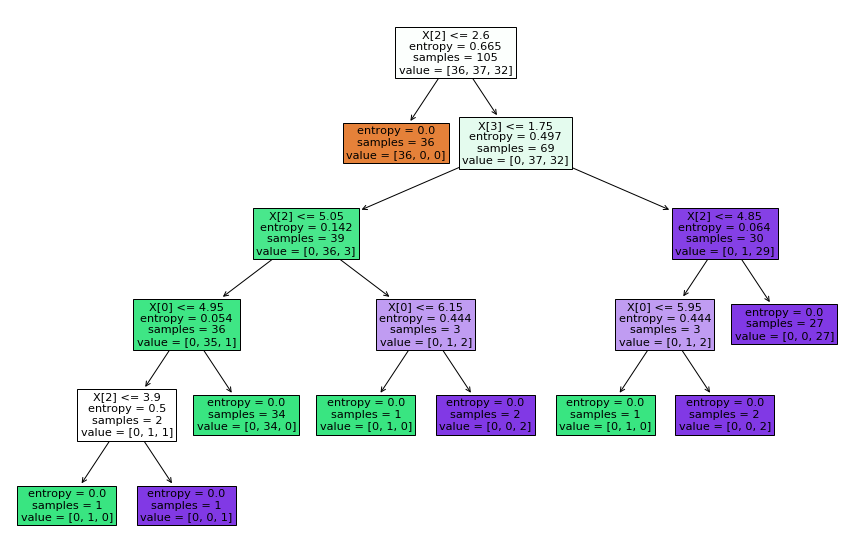

In [101]:
plt.figure(figsize=(15,10))
tree.plot_tree(model1,filled=True)